<a href="https://colab.research.google.com/github/sangzun-han/opencv-flattening/blob/main/marker_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[266.0, 2374.0]
[2756.0, 2372.0]
[190.0, 604.0]
[2782.0, 508.0]


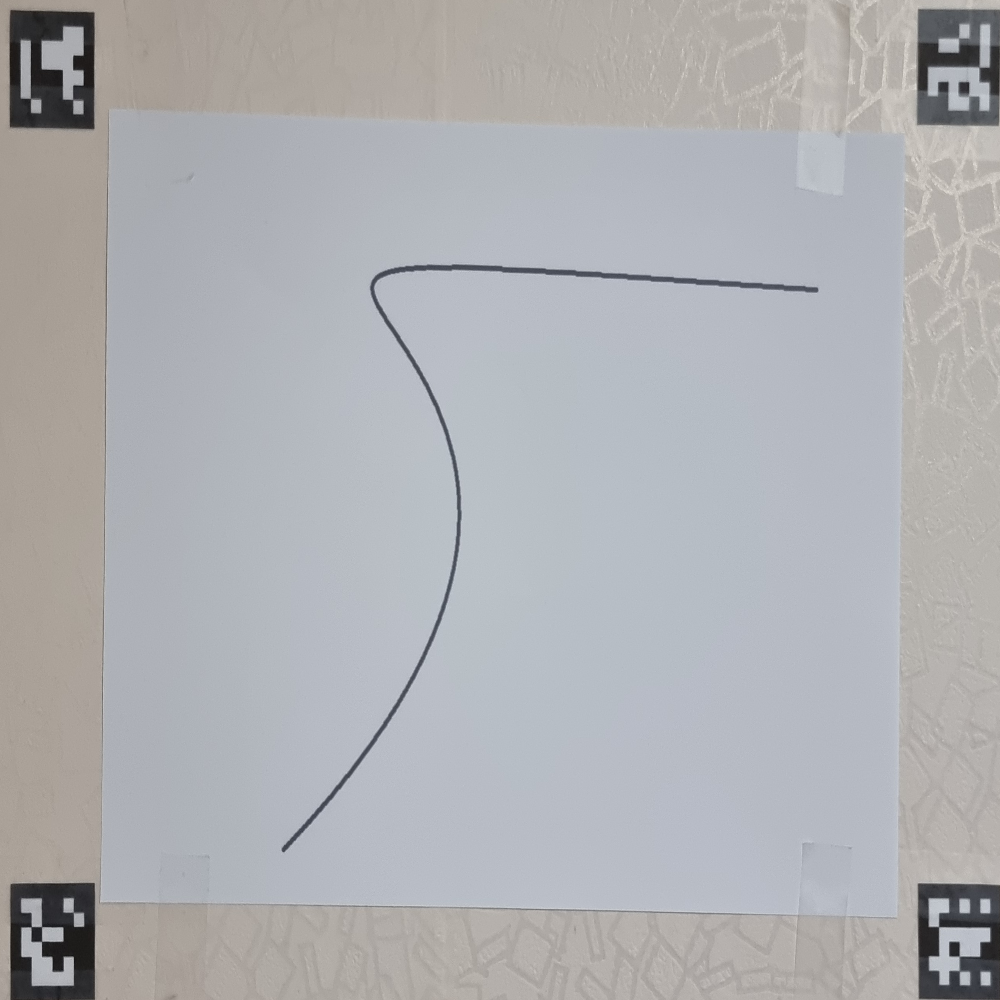

True

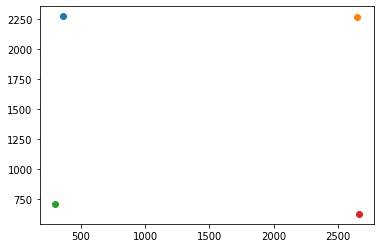

In [2]:
# 평탄화
import numpy as np
import cv2, PIL
from cv2 import aruco
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/CrackDetection/test2.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(img.copy(), corners, ids)

#cv2_imshow(frame_markers)

for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
    if ids[i][0] == 1:
      ap = [c[0, 0], c[0, 1]]
      print(ap)
    if ids[i][0] == 2:
      cp = [c[1, 0], c[1, 1]]
      print(cp)
    if ids[i][0] == 3:
      bp = [c[3, 0], c[3, 1]]
      print(bp)
    if ids[i][0] == 4:
      dp = [c[2, 0], c[2, 1]]
      print(dp)

# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([ap, bp, cp, dp])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (1000,1000))

cv2_imshow(dst)
cv2.imwrite('/content/drive/MyDrive/CrackDetection/target.jpg', dst)

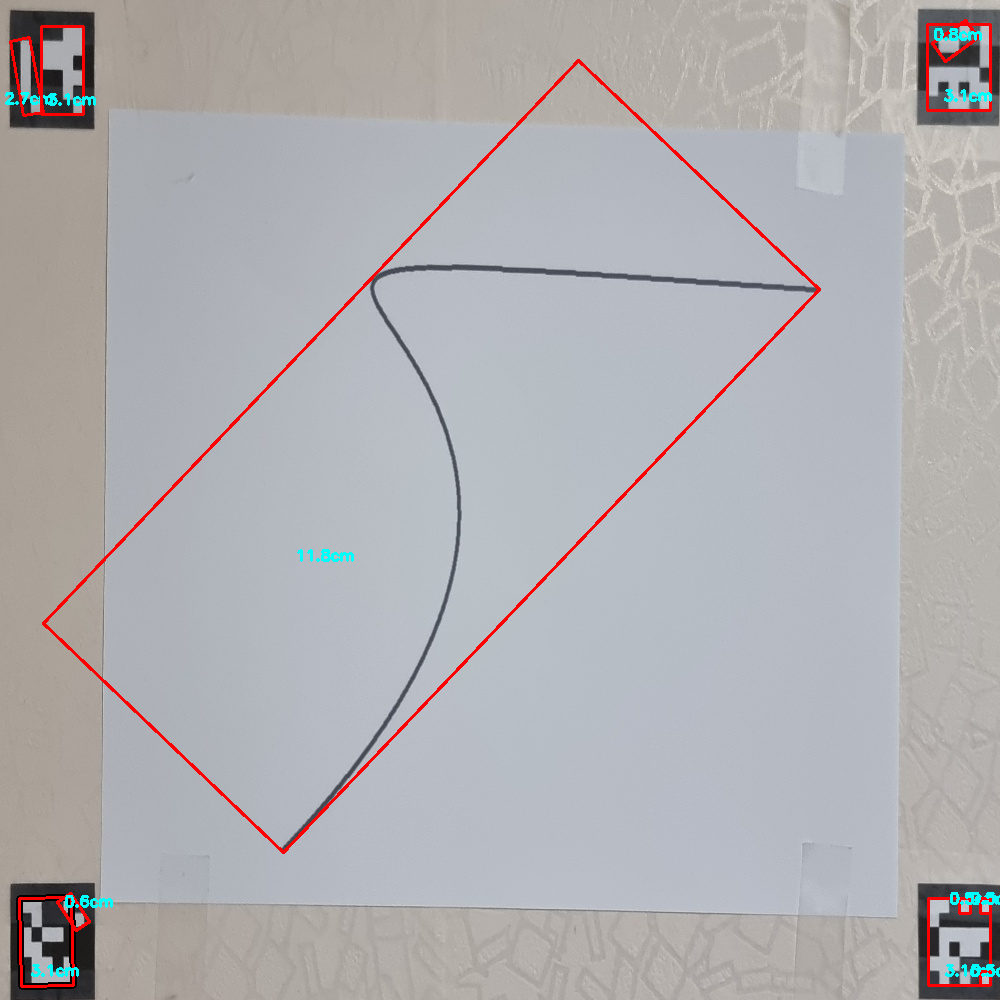

-1

In [59]:
import cv2
import numpy as np
import imutils
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/CrackDetection/target.jpg')
marker = 3.14

def imgscal(img, scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    return img

img = imgscal(img, 30)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)
cnts = [x for x in cnts if cv2.contourArea(x) > 100]

def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
# minAreaReact() 인자로 입력한 contour에 외접하면서 면적이 가장 작은 직사각형 구함
bluerect = cv2.minAreaRect(cnts[0])

# boxPoints() minAreaRect() 함수로 얻은 직사각형의 꼭지점 4개의 좌표를 얻음
bluebox = cv2.boxPoints(bluerect)

bluebox = np.array(bluebox)
bluebox = perspective.order_points(bluebox.astype(int))
(tl, tr, br, bl) = bluebox
tm = midpoint(tl, tr)
tb = midpoint(bl, br)

dist_in_pixel = euclidean(tm,tb)
dist_in_cm = marker
pixel_per_cm = dist_in_pixel / dist_in_cm

cv2.drawContours(img, [bluebox.astype(int)], 0, (0, 0, 0), 5)

for cnt in cnts:
    if cv2.contourArea(cnt) < 100:
        continue
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.array(box)
    box = perspective.order_points(box.astype(int))
    (tl, tr, br, bl) = box
    tm = midpoint(tl, tr)
    tb = midpoint(bl, br)
    wid = euclidean(tm, tb)/pixel_per_cm
    cv2.drawContours(img, [box.astype("int")], -1, (0, 0, 255), 2)
    cv2.putText(img, "{:.1f}cm".format(wid), (int(tm[0] - 15), int(tb[1] - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)


cv2_imshow(img)
cv2.waitKey(0)

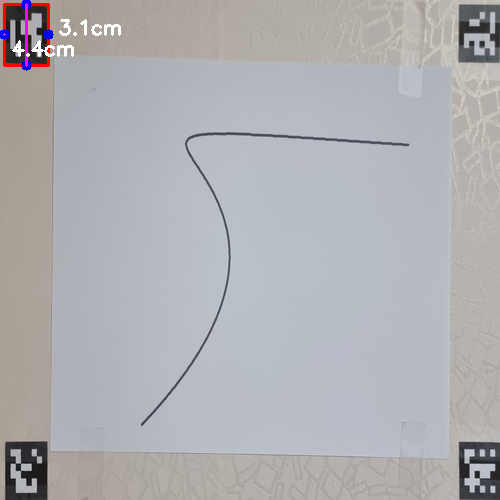

[[[  8 441]]

 [[  7 442]]

 [[  5 442]]

 [[  5 499]]

 [[  5 443]]

 [[  6 442]]

 [[  7 442]]

 [[  8 441]]

 [[ 45 441]]

 [[ 47 443]]

 [[ 47 499]]

 [[ 47 442]]

 [[ 46 441]]]번째 contour


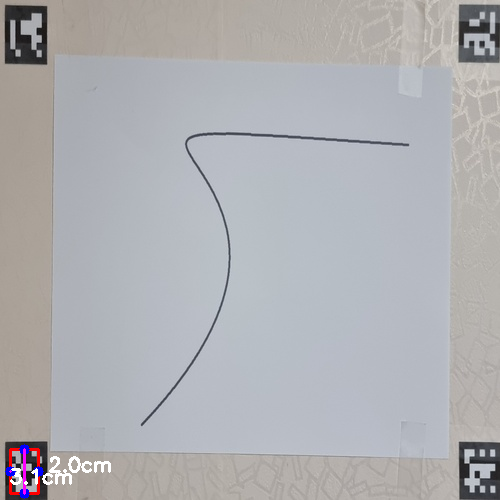

[[[ 32 449]]

 [[ 32 450]]

 [[ 31 451]]

 [[ 31 453]]

 [[ 32 454]]

 [[ 32 455]]

 [[ 33 455]]

 [[ 35 457]]

 [[ 35 458]]

 [[ 36 459]]

 [[ 36 460]]

 [[ 37 461]]

 [[ 37 462]]

 [[ 37 459]]

 [[ 38 458]]

 [[ 40 458]]

 [[ 41 459]]

 [[ 41 462]]

 [[ 40 463]]

 [[ 39 463]]

 [[ 41 463]]

 [[ 41 461]]

 [[ 42 460]]

 [[ 41 459]]

 [[ 41 456]]

 [[ 39 456]]

 [[ 38 455]]

 [[ 38 454]]

 [[ 37 454]]

 [[ 36 453]]

 [[ 36 449]]]번째 contour


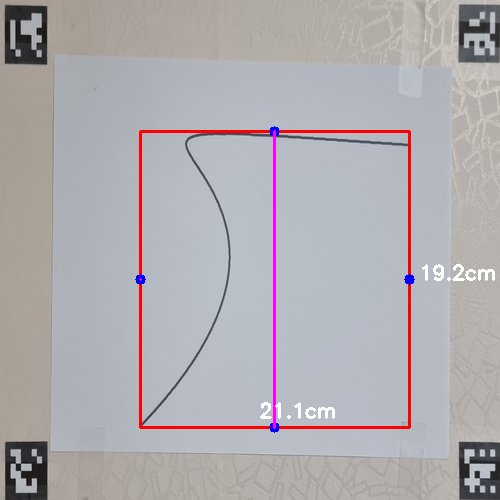

[[[462 441]]

 [[461 442]]

 [[459 442]]

 [[459 453]]

 [[458 454]]

 [[458 455]]

 [[459 456]]

 [[459 499]]

 [[459 443]]

 [[460 442]]

 [[461 442]]

 [[462 441]]

 [[474 441]]

 [[475 442]]

 [[499 442]]

 [[475 442]]

 [[474 441]]]번째 contour


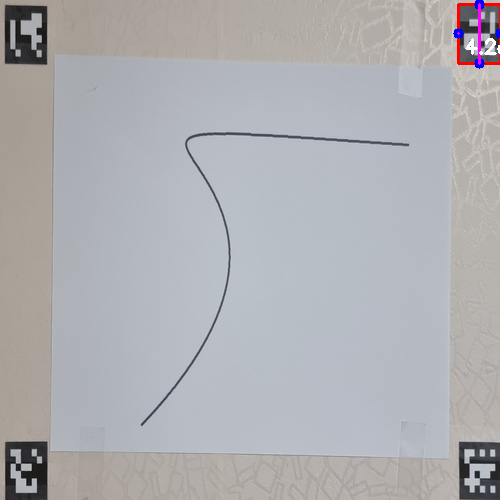

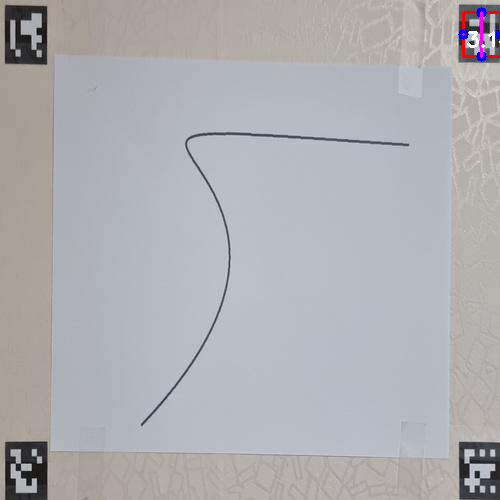

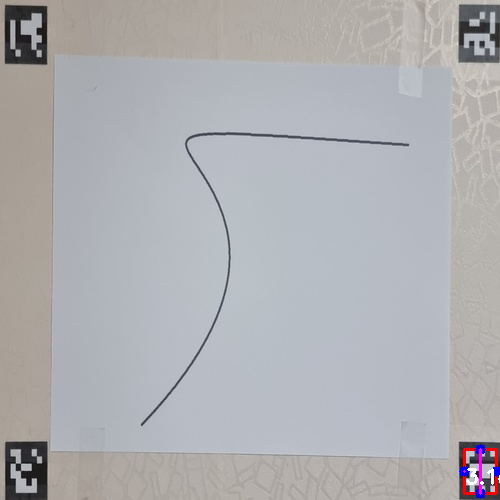

[[[480 449]]

 [[479 450]]

 [[479 455]]

 [[480 456]]

 [[484 456]]

 [[484 450]]

 [[483 449]]]번째 contour
[[[492 485]]

 [[491 486]]

 [[490 486]]

 [[490 491]]

 [[491 492]]

 [[494 492]]

 [[494 491]]

 [[495 490]]

 [[495 488]]

 [[494 487]]

 [[494 485]]]번째 contour
[[[491 449]]

 [[490 450]]

 [[490 456]]

 [[494 456]]

 [[495 455]]

 [[495 452]]

 [[494 451]]

 [[494 449]]]번째 contour


In [ ]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import cv2

def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

image = cv2.imread('/content/drive/MyDrive/CrackDetection/target.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)

edged = cv2.Canny(gray, 50, 100)
# dilate(img, kernel, iterations)
# img : dilate(팽창) 시킬이미지, kernel: dilate를 위한 커널 iterations : 반복횟수
edged = cv2.dilate(edged, None, iterations=1)
# erode(img,kernel,iterations) 침식
edged = cv2.erode(edged, None, iterations=1)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# grab_contours : contour의 총 갯수
cnts = imutils.grab_contours(cnts)

cnts, _ = contours.sort_contours(cnts)
pixelsPerMetric = None

for c in cnts:
  if cv2.contourArea(c) < 100:
    print("{0}번째 contour".format(c))
    continue
  
  orig = image.copy()
  x,y,w,h = cv2.boundingRect(c)
  orig = cv2.rectangle(orig, (x,y), (x+w, y+h), (0,0,255),2)
  
  
  tl, tr, br, bl = (x,y+h),(x+w,y+h),(x+w,y),(x,y)
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)

  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255,0,0), -1)
  cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255,0,0), -1)
  cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255,0,0), -1)
  cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255,0,0), -1)

  cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255,0,255), 2)
  cv2.line(orig, (int(tlblX), int(tlblY)), (int(tlblX), int(trbrY)), (255,0,255), 2)

  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

  if pixelsPerMetric is None:
    pixelsPerMetric = dB / 3.14
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric

  cv2.putText(orig, "{:.1f}cm".format(dimA),
		(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
  cv2.putText(orig, "{:.1f}cm".format(dimB),
		(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)

  cv2_imshow(orig)
  cv2.waitKey(0)

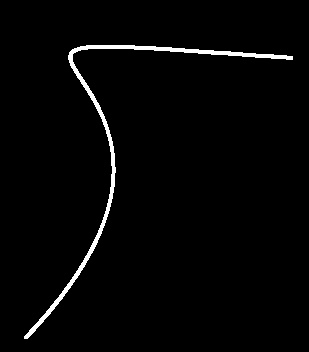

24 292
45 338
24 45 268 293


In [58]:
import cv2, sys
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


image = cv2.imread('/content/drive/MyDrive/CrackDetection/target2.jpg')
image_gray = cv2.imread('/content/drive/MyDrive/CrackDetection/target2.jpg', cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)
ret, thresh = cv2.threshold(blur, 127,255,cv2.THRESH_BINARY)
edged = cv2.Canny(blur, 10, 250)
cv2.waitKey(0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

contours_xy = np.array(contours)
contours_xy.shape

x_min, x_max = 0,0
x_value = list()
for i in range(len(contours_xy)):
  for j in range(len(contours_xy[i])):
    x_value.append(contours_xy[i][j][0][0])
    x_min = min(x_value)
    x_max = max(x_value)
print(x_min, x_max)

y_min, y_max = 0,0
y_value = list()
for i in range(len(contours_xy)):
  for j in range(len(contours_xy[i])):
    y_value.append(contours_xy[i][j][0][1])
    y_min = min(y_value)
    y_max = max(y_value)
print(y_min, y_max)

x = x_min
y = y_min
w = x_max - x_min
h = y_max - y_min
print(x,y,w,h)
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('trim.jpg',img_trim)
org_image = cv2.imread('trim.jpg')

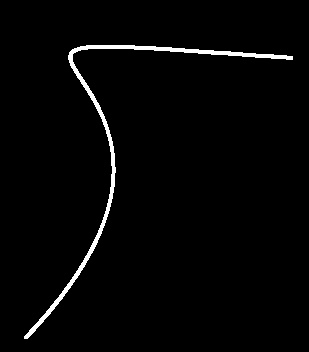

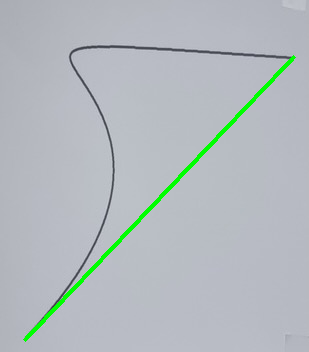

In [57]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def convex():
  img = cv2.imread('/content/drive/MyDrive/CrackDetection/target2.jpg')
  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(imgray, ksize=(5,5), sigmaX=0)
  ret, thr = cv2.threshold(blur, 127,255,cv2.THRESH_BINARY)
  edged = cv2.Canny(blur, 10, 250)
  cv2.waitKey(0)

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
  closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
  cv2_imshow(closed)

  contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnt = contours[0]

  rect = cv2.minAreaRect(cnt)
  box = cv2.boxPoints(rect)
  box = np.int0(box)

  img = cv2.line(img, tuple(box[0]), tuple(box[3]), (0,255,0),3)

  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

convex()